In [3]:
import pandas as pd
import altair as alt
import numpy as np
from bs4 import BeautifulSoup
import requests
import time
import missingno as ms

source - https://simplemaps.com/data/world-cities for population numbers dataset


In [30]:
"""# reading in the values dataset and new var names
df = pd.read_csv("data_cost-of-living_v2.csv")
names = pd.read_csv("data_names_cost_of_liv.csv")
df.columns = names['Name'].tolist()

# sorting by only canadian cities
df_can = df[df['country']=='Canada'].reset_index().drop(['country'], axis=1)

## 2nd dataset with lat/lng, population, provinces ##
df_world = pd.read_csv("data_worldcities.csv")

# removing columns I don't care about
world_lesscol = df_world.drop(['city','iso2','iso3','capital','id'], axis = 1)

# filtering for Canada and removing country col
can_world = world_lesscol[world_lesscol['country']=='Canada'].drop(['country'], axis=1)

# rename city col to match
can_world.rename(columns={'city_ascii':'city'}, inplace=True)

# merging
total_df = pd.merge(df_can, can_world, how='left', on=['city'])

# checking for duplicates
from collections import Counter
cities_lst_t = total_df['city'].tolist()
counts = dict(Counter(cities_lst_t))
duplicates = {key:value for key, value in counts.items() if value > 1}
print(duplicates)

# removing Cornwall PEI, Windsor QB, and Lloydminster AB (population checked) 
total_df = total_df.drop([72,22,87], inplace=True) 
 
# dealing with indexes 
total_df.reset_index(inplace=True)
total_df.drop(['level_0', 'index'], axis=1, inplace=True)
total_df"""
#total_df.to_csv('data_extra.csv')

,city,lat,lng,admin_name,population
126,Toronto,43.7417,-79.3733,Ontario,5429524.0
217,Montreal,45.5089,-73.5617,Quebec,3519595.0
339,Vancouver,49.2500,-123.1000,British Columbia,2264823.0
558,Calgary,51.0500,-114.0667,Alberta,1239220.0
649,Edmonton,53.5344,-113.4903,Alberta,1062643.0
...,...,...,...,...,...
42663,Saint-Honore,48.5333,-71.0833,Quebec,5257.0
42684,Burton,45.8009,-66.4066,New Brunswick,5119.0
42686,Spallumcheen,50.4462,-119.2121,British Columbia,5106.0
42695,Saint-Henri,46.7000,-71.0667,Quebec,5023.0


In [93]:
df = pd.read_csv("data_extra.csv", index_col=0)
df.tail()

,city,meal_cheap,meal_mid,meal_mcd,r_beer_dom,r_beer_imp,r_cappuccino,r_coke,r_water,milk_1L,...,bed3_out,buy_centre,buy_out,salary,mortgage,data_quality,lat,lng,admin_name,population
0,Toronto,18.53,85.23,9.63,5.19,6.36,3.59,1.95,1.53,2.52,...,2302.11,9834.67,7249.17,3249.79,5.24,1,43.7417,-79.3733,Ontario,5429524.0
1,Montreal,14.82,66.70,9.63,5.93,5.93,3.57,1.76,1.37,2.17,...,1342.69,6069.66,3487.84,2823.94,5.41,1,45.5089,-73.5617,Quebec,3519595.0
2,Vancouver,18.16,83.38,8.89,5.19,6.67,3.80,1.94,1.77,2.19,...,2341.43,9983.22,7902.75,3474.89,4.46,1,49.2500,-123.1000,British Columbia,2264823.0
3,Calgary,18.53,63.00,8.89,5.19,5.93,3.75,1.75,1.53,1.73,...,1504.96,3328.49,2651.05,3807.94,4.58,1,51.0500,-114.0667,Alberta,1239220.0
4,Edmonton,18.53,66.70,8.89,5.19,5.93,3.79,1.82,1.73,1.97,...,1153.16,2200.36,1841.51,3403.02,4.82,1,53.5344,-113.4903,Alberta,1062643.0


In [142]:
df.rename(columns={'admin_name':'province'}, inplace=True)

In [100]:
df.iloc[df["population"].argmin()]


city               Flin Flon
meal_cheap               NaN
meal_mid                 NaN
meal_mcd               11.12
r_beer_dom              4.45
                    ...     
data_quality               0
lat                  54.7667
lng                -101.8778
admin_name      Saskatchewan
population            5185.0
Name: 118, Length: 61, dtype: object

In [95]:
df.columns

Index(['city', 'meal_cheap', 'meal_mid', 'meal_mcd', 'r_beer_dom',
       'r_beer_imp', 'r_cappuccino', 'r_coke', 'r_water', 'milk_1L',
       'bread_white', 'rice_1kg', 'eggs_doz', 'cheese_local_1kg',
       'chicken_fillet_1kg', 'beef_round_1kg', 'apple_1kg', 'banana_1kg',
       'orange_1kg', 'tomato_1kg', 'potato_1kg', 'onion_1kg', 'lettuce',
       'water_1.5L', 'winebottle_mid', 'beer_dom', 'beer_imp', 'cigarettes_20',
       'ticket', 'ticket_month', 'taxi_start', 'taxi_1km', 'taxi_1hrwait',
       'gas_1L', 'vw_golf', 'toyota_corolla', 'basic', 'mobile_1min',
       'internet', 'gym_month', 'tennis_rent', 'cinema', 'preschool',
       'primary_school', 'jeans', 'summer_dress', 'shoes_running',
       'shoes_business', 'bed1_centre', 'bed1_out', 'bed3_centre', 'bed3_out',
       'buy_centre', 'buy_out', 'salary', 'mortgage', 'data_quality', 'lat',
       'lng', 'admin_name', 'population'],
      dtype='object')

<AxesSubplot: >

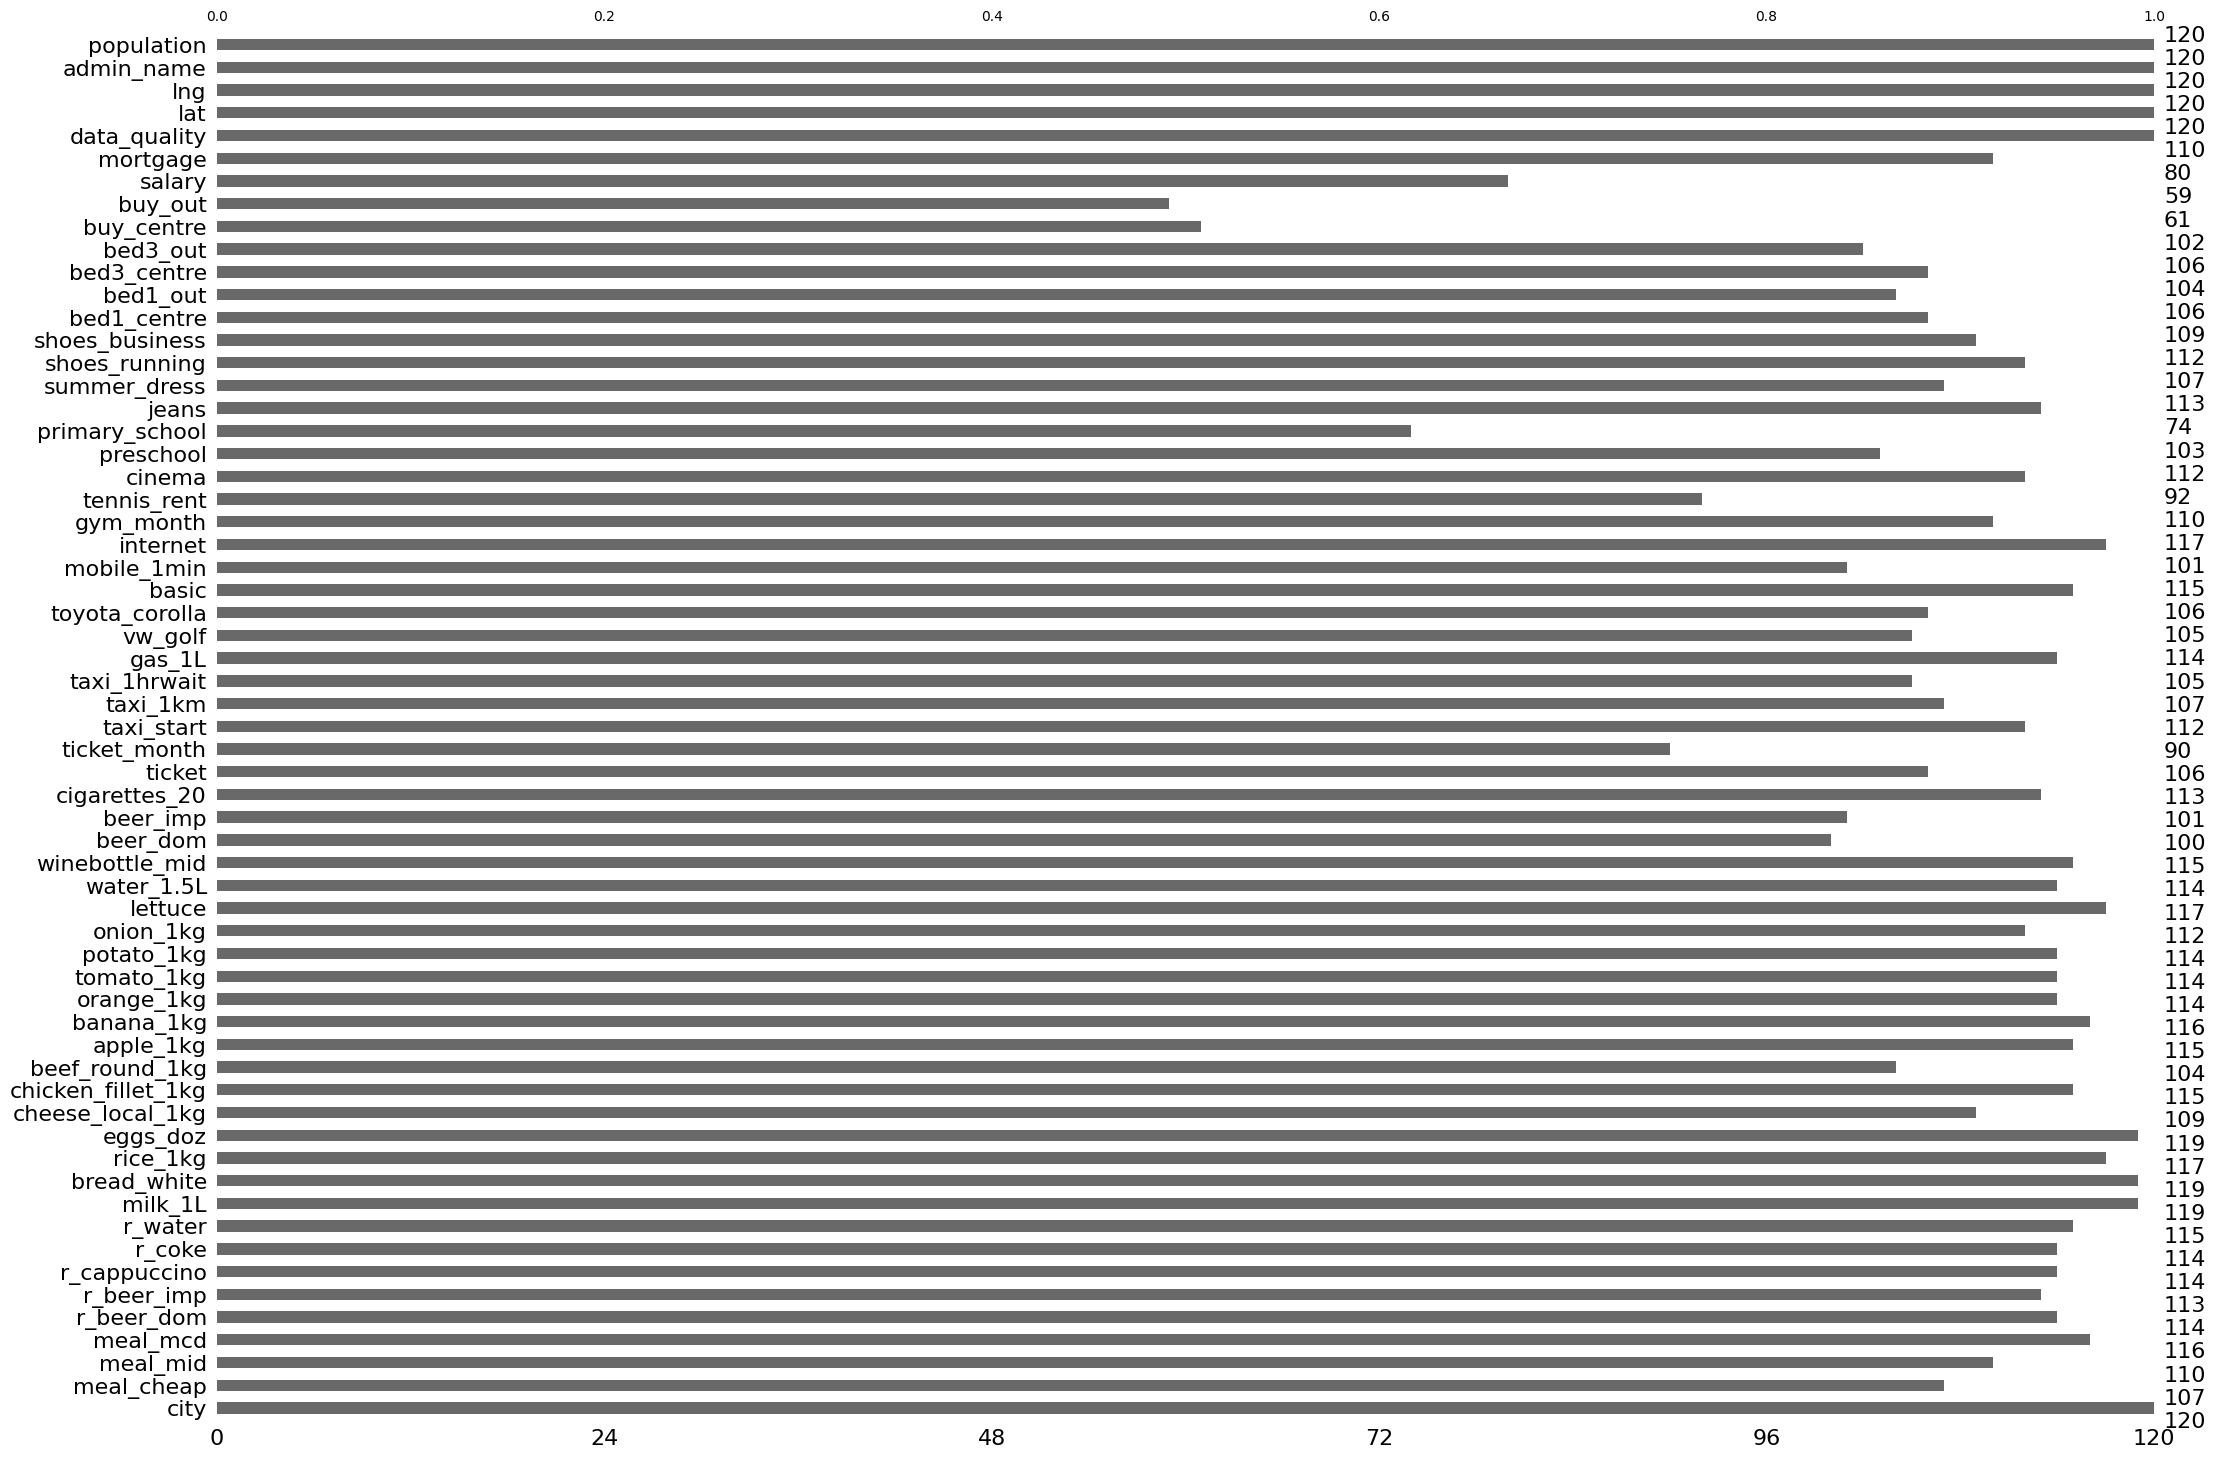

In [121]:
ms.bar(df)

In [126]:
df[-pd.isnull(df['milk_1L'])]

,city,meal_cheap,meal_mid,meal_mcd,r_beer_dom,r_beer_imp,r_cappuccino,r_coke,r_water,milk_1L,...,bed3_out,buy_centre,buy_out,salary,mortgage,data_quality,lat,lng,admin_name,population
0,Toronto,18.53,85.23,9.63,5.19,6.36,3.59,1.95,1.53,2.52,...,2302.11,9834.67,7249.17,3249.79,5.24,1,43.7417,-79.3733,Ontario,5429524.0
1,Montreal,14.82,66.70,9.63,5.93,5.93,3.57,1.76,1.37,2.17,...,1342.69,6069.66,3487.84,2823.94,5.41,1,45.5089,-73.5617,Quebec,3519595.0
2,Vancouver,18.16,83.38,8.89,5.19,6.67,3.80,1.94,1.77,2.19,...,2341.43,9983.22,7902.75,3474.89,4.46,1,49.2500,-123.1000,British Columbia,2264823.0
3,Calgary,18.53,63.00,8.89,5.19,5.93,3.75,1.75,1.53,1.73,...,1504.96,3328.49,2651.05,3807.94,4.58,1,51.0500,-114.0667,Alberta,1239220.0
4,Edmonton,18.53,66.70,8.89,5.19,5.93,3.79,1.82,1.73,1.97,...,1153.16,2200.36,1841.51,3403.02,4.82,1,53.5344,-113.4903,Alberta,1062643.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Peace River,14.08,42.62,8.15,5.56,6.30,4.29,1.82,1.86,2.24,...,NaN,NaN,NaN,NaN,5.47,0,56.2339,-117.2897,Alberta,6842.0
116,Parry Sound,NaN,NaN,8.89,5.93,5.93,3.15,2.41,1.67,1.65,...,NaN,NaN,NaN,NaN,NaN,0,45.3333,-80.0333,Ontario,6408.0
117,La Ronge,NaN,37.06,8.89,4.45,4.82,2.22,1.85,1.48,1.85,...,741.15,NaN,NaN,NaN,2.64,0,55.1000,-105.3000,Saskatchewan,5671.0
118,Flin Flon,NaN,NaN,11.12,4.45,5.19,NaN,2.22,1.48,3.59,...,NaN,NaN,NaN,NaN,NaN,0,54.7667,-101.8778,Saskatchewan,5185.0


In [ ]:
#df.columns = pd.MultiIndex.from_product([sex, age], names=['Sex', 'Age'])


In [160]:
alt.Chart(df).mark_circle(size = 100).encode(
    alt.X('meal_cheap', axis=alt.Axis(format='$')),
    alt.Y('meal_mid', axis=alt.Axis(format='$s')),
    tooltip=['city', 'meal_cheap','meal_mid']
).configure_axis(titleFontSize=15,labelFontSize=13)

alt.Chart(...)

In [184]:
alt.Chart(df[(df['city']=='Edmonton') | (df['city']=='Kelowna')| (df['city']=='Vancouver')| (df['city']=='St. Catharines')]).mark_bar().encode(
    alt.Y('city', title = "", sort='x'),
    alt.X('bed1_centre', axis=alt.Axis(format='$s')),
    tooltip=['city', 'meal_cheap','meal_mid']
).configure_axis(titleFontSize=20,labelFontSize=20)

/Users/mf/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [144]:
alt.Chart(df[-pd.isnull(df['milk_1L'])]).mark_bar().encode(
    alt.X('milk_1L', title='Cost', axis=alt.Axis(orient='top',format='$')),
    alt.Y('city', sort='x', title=""),
    tooltip=['milk_1L','province']
)

alt.Chart(...)

workflow:
- tried to scrape provinces off of wikipedia, had problems where city pages didn't always come from the same url format like I expected (case of city names that are also other things)